##### These posts have all dealt with a similar subject. Namely, how to make a time-series be stationary in the sense that it doesn’t  have a mean dependent on time. We do this by differencing the time series, and when I say that I mean that generally to mean partial differencing and partial differencing reduction. The point is get rid of time dependence in the residual, and you can introduce that by over-differencing, and under-differencing, so ARIMA type models fix this through AR, and MA terms.

In [1]:
# https://barnesanalytics.com/garch-models-in-python
import datetime as dt
import sys

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from arch import arch_model


start = dt.datetime(2000,1,1)
end = dt.datetime(2017,1,1)

##### This post is a little bit different. In this post, we want to remove the dependence of the error variance on time in order to get a better model. This is where my brain starts to push back on the need for a model like this. This would mean that my model is heteroscadastic, but not necessarily unbiased. If the expected value of my errors is zero, then I should get a solid unbiased estimate slap some robust standard errors on it, and there really is no need for this model. Okay, we’re done here, pack it up everyone, we don’t need GARCH, ARCH or whatever this thing is. Let’s go home.

##### “What about simulating the value-at-risk from fraud? So that we can guess at how much ” the annoying part of my brain in the back shouts out. Well, I guess we could monte-carlo something with a distribution, but the volatility of the amount of money that we lose doesn’t appear to be normally distributed, but it does appear stationary. It looks like we have periods where the volatility in losses appears to be high, and then it dips down to low volatility periods. So we need some way to cluster that volatility. It looks like we need some sort of autoregressive process for volatility.

##### So in this post here’s what we’re going to do:
###### Test for conditional heteroscadasiticity
###### Run a GARCH model
###### Simulate the GARCH process
###### Use that simulation to determine value at risk

##### Okay, so our data is going to come from yahoo finance. Specifically, we’ll be looking at the S&P 500 daily returns. This data presents a very useful case study for GARCH models. Here’s the reason: The stock market tends to be pretty clumpy. And what I mean by that is that days with a lot of volatility seem to cluster together. We’ll use this to assign a value at risk to the stock market. This is a useful method, because you can say that five days from now, I know that there will be a 5% probability that I will lose more than \$1000 in the stock market or some similar value.
##### This is directly analogous to the fraud loss situation which I have described above. For example, we might be interested to know, what is the maximum loss that I expect to lose in the next 30 days due to fraud losses given 5% probability that my loss will be no greater. Essentially, that is the same question, as how much am I going to lose in the stock market.

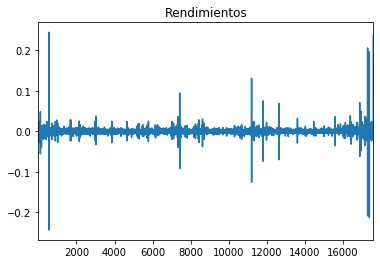

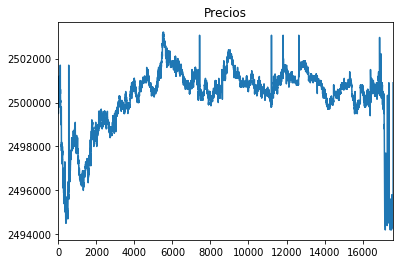

In [2]:
sp500 = pd.read_csv('C:\\Users\\suare\\MEGA\\PhD\\1 Code and data\\data\\raw\\quantquote\\one_second_level\\242321_csv\\20170914\spy.csv', header=None)
sp500.columns = ['Time','Open','High','Low','Close','Volume','Suspicious']
#sp500 = web.get_data_google('SPY', start=start, end=end)
returns = 100 * sp500['Close'].pct_change().dropna()   # pct_change es para rendimientos
returns.plot(title="Rendimientos")
plt.show()
prices = sp500['Close'].dropna() 
prices.plot(title='Precios')
plt.show()

##### We can fit a GARCH model to this data by calling the arch package that we downloaded earlier.
##### TO-READ: https://arch.readthedocs.io/en/latest/univariate/introduction.html 

In [3]:
#TODO: make sure that we do not need to re-scale it
model=arch_model(prices, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143357.8486333856
Iteration:      2,   Func. Count:     13,   Neg. LLF: 142935.46439755798
Iteration:      3,   Func. Count:     20,   Neg. LLF: 137910.77637099737
Iteration:      4,   Func. Count:     27,   Neg. LLF: 137575.25220397327
Iteration:      5,   Func. Count:     34,   Neg. LLF: 137278.59871661552
Iteration:      6,   Func. Count:     41,   Neg. LLF: 137217.55312877076
Iteration:      7,   Func. Count:     48,   Neg. LLF: 137193.11569330402
Iteration:      8,   Func. Count:     55,   Neg. LLF: 137180.0096337978
Iteration:      9,   Func. Count:     62,   Neg. LLF: 137172.19411537668
Iteration:     10,   Func. Count:     69,   Neg. LLF: 137163.82063937036
Iteration:     11,   Func. Count:     76,   Neg. LLF: 137157.06942550093
Iteration:     12,   Func. Count:     82,   Neg. LLF: 137156.53074671264
Iteration:     13,   Func. Count:     88,   Neg. LLF: 137156.15336004138
Iteration:     14,   Func. Count:     94,   Neg. LLF:

In [4]:
model.forecast()

TypeError: forecast() missing 1 required positional argument: 'params'

In [ ]:
arch.

In [ ]:
forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

In [ ]:
lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

In [ ]:
model.

In [ ]:
print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of prices')
plt.show()

In [ ]:
import rpy2
import os
#os.environ['R_USER'] = 'D:\Anaconda3\Lib\site-packages\rpy2'
from rpy2.robjects.packages import importr
base = importr('base')
print(base.R_home())

In [ ]:
rugarch = importr("rugarch", lib_loc = "C:/Users/suare/OneDrive/Documents/asuare/R/win-library/3.6")

In [ ]:
spec = rugarch.ugarchspec()
print(spec)

In [ ]:
# __show = rpy2.rinterface.baseenv.get("show")
# __print = rpy2.rinterface.baseenv.get("print")
# __show(spec)

In [ ]:
# then, we apply rugarch

In [ ]:
#  # The variance receives the GARCH(1,1) model while the mean takes an ARMA(p,q) model, 
#  # where p and q are chosen above. We also choose the sged distribution for the errors.
#  spec = ugarchspec(
#    variance.model=list(garchOrder=c(1,1)),
#    mean.model=list(armaOrder=c(final.order[1], final.order[3]), include.mean=T),
#    distribution.model="sged")
#  
#  # We have chosen to use the hybrid solver, to increase the likelihood of convergence:
#  fit = ugarchfit(spec, spPricesOffset, solver = 'hybrid') # full code in: https://www.quantstart.com/articles/ARIMA-GARCH-Trading-Strategy-on-the-SP500-Stock-Market-Index-Using-R
#  
#  if(is(fit, "warning")) {
#    print(paste(index(spPricesOffset[windowLength]), 
#                "Not fit yet. Let's fix this...", sep=' '))
#    print("------------------")
#  } else {
#    fore = ugarchforecast(fit, data = spPricesOffset,n.ahead=1)  # TODO: does it work with this data?
#    print(fore)
#    ind = fore@forecast$seriesFor
#    # print(ind)  
#    # print('______')
#    # print(fit)
#    # print('______')
#    # print('______')
#    # print(fit@fit$coef) # here I return the coefficients
#    # print('##########')
#  }
